In [209]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_files
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import nltk
import os
import re
import random
%matplotlib inline

In [2]:
yelp_train = load_files('.\\yelp\\train', description='imdb reviews train', categories=['neg','pos'], shuffle='True',
                            load_content=True, encoding='utf-8')
yelp_test = load_files('.\\yelp\\test', description='imdb reviews test', categories=['neg','pos'], shuffle='True',
                            load_content=True, encoding='utf-8')
docs_test = yelp_test.data

In [216]:
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='log', penalty='l2', alpha=1e-3,
                                             n_iter=5, random_state=50)),
                      ])
text_clf = text_clf.fit(yelp_train.data, yelp_train.target)
predicted = text_clf.predict(docs_test)
print '%.5f' %  np.mean(predicted == yelp_test.target)

0.62000


In [229]:
#Pipeline of default count vectorizer, and default random forest classifier
#Outputs test accuracy of classifier
text_clf = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,1))),
                      ('clf', MultinomialNB())
                      ])
text_clf = text_clf.fit(yelp_train.data, yelp_train.target)
predicted = text_clf.predict(docs_test)
print '%.5f' % (np.mean(predicted == yelp_test.target))

0.52500


In [217]:
text_clf_2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='log', penalty='l2', alpha=1e-3,
                                             n_iter=5, random_state=50)),
                      ])
text_clf_2 = text_clf_2.fit(yelp_train.data, yelp_train.target)
predicted2 = text_clf_2.predict(docs_test)
print '%.5f' % np.mean(predicted2 == yelp_test.target)

0.63000


In [218]:
text_clf_3 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC(kernel='linear')),
                      ])
text_clf_3 = text_clf_3.fit(yelp_train.data, yelp_train.target)
predicted3 = text_clf_3.predict(docs_test)
print '%.5f' % np.mean(predicted3 == yelp_test.target)

0.64500


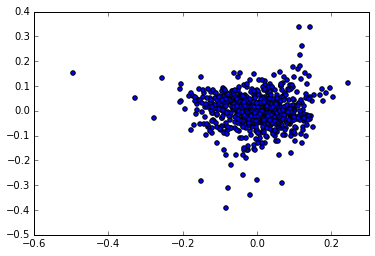

In [221]:
# Scatterplot of PCA to see if a particular ML algorithm suggests itself for use here.
# It does not look like there is any particularly "nice" MLA to use
count_vect_yelp = CountVectorizer(ngram_range = (1,2))
count_vect_yelp = count_vect_yelp.fit_transform(yelp_train.data)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(count_vect_yelp)
pca = PCA(n_components = 2)
pca = pca.fit_transform(tfidf.toarray())
pca_x = tuple(x[0] for x in pca)
pca_y = tuple(x[1] for x in pca)
fig, ax = plt.subplots()
ax.scatter(pca_x[:],pca_y[:])
plt.show()

In [219]:
#Pipeline of default count vectorizer, tf-idf transformer, and support vector classifier with polynomial kernel
#Outputs test accuracy of classifier
text_clf_4 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC(kernel='poly')),
                      ])
text_clf_4 = text_clf_4.fit(yelp_train.data, yelp_train.target)
predicted4 = text_clf_4.predict(docs_test)
print '%.5f' %  np.mean(predicted4 == yelp_test.target)

0.62000


In [222]:
#Pipeline of default count vectorizer, tf-idf transformer, and support vector classifier with rbf kernel
#Outputs test accuracy of classifier
text_clf_5 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC(kernel='rbf')),
                      ])
text_clf_5 = text_clf_5.fit(yelp_train.data, yelp_train.target)
predicted5 = text_clf_5.predict(docs_test)
print '%.5f' % np.mean(predicted5 == yelp_test.target)

0.61500


In [223]:
#Pipeline of default count vectorizer, tf-idf transformer, and stochastic gradient descent SVC
#Outputs test accuracy of classifier
text_clf_6 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3,
                                             n_iter=5, random_state=50)),
                      ])
text_clf_6 = text_clf_6.fit(yelp_train.data, yelp_train.target)
predicted6 = text_clf_6.predict(docs_test)
print '%.5f' % np.mean(predicted6 == yelp_test.target)

0.65000


In [224]:
#Pipeline of default count vectorizer, tf-idf transformer, and stochastic gradient descent SVC
#with modified loss function
#Outputs test accuracy of classifier
text_clf_7 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='modified_huber', penalty='l1', alpha=1e-3,
                                             n_iter=5, random_state=50)),
                      ])
text_clf_7 = text_clf_7.fit(yelp_train.data, yelp_train.target)
predicted7 = text_clf_7.predict(docs_test)
print '%.5f' % np.mean(predicted7 == yelp_test.target)

0.65500


In [225]:
#Pipeline of default count vectorizer, tf-idf transformer, and random forest classifier
#Outputs test accuracy of classifier
text_clf_8 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier()),
                      ])
text_clf_8 = text_clf_8.fit(yelp_train.data, yelp_train.target)
predicted8 = text_clf_8.predict(docs_test)
print '%.5f' % np.mean(predicted8 == yelp_test.target)

0.59500


In [213]:
text_clf_9 = Pipeline([('vect', CountVectorizer(ngram_range=(1,5))),
                      ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier(n_estimators = 12, max_features = 4, criterion = 'entropy', random_state = 42, \
                                                    bootstrap=True)),
                      ])
text_clf_9 = text_clf_9.fit(yelp_train.data, yelp_train.target)
predicted9 = text_clf_9.predict(docs_test)
print '%.5f' % (np.mean(predicted9 == yelp_test.target))

0.70000


In [228]:
#Pipeline of default count vectorizer, tf-idf transformer, and default multinomial naive Bayes classifier
#Outputs test accuracy of classifier
text_clf = Pipeline([  ('vect', CountVectorizer(ngram_range=(1,1))),
                       ('tfidf', TfidfTransformer()),
                       ('clf', MultinomialNB()),
                      ])
text_clf = text_clf.fit(yelp_train.data, yelp_train.target)
predicted = text_clf.predict(docs_test)
print '%.5f' % (np.mean(predicted == yelp_test.target))

0.61000
